In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df = pd.read_csv("Emotion_Dataset.csv")
print(df.head())

                                            sentence emotion
0      i just feel really helpless and heavy hearted    fear
1  ive enjoyed being able to slouch about relax a...     sad
2  i gave up my internship with the dmrg and am f...    fear
3                         i dont know i feel so lost     sad
4  i am a kindergarten teacher and i am thoroughl...    fear


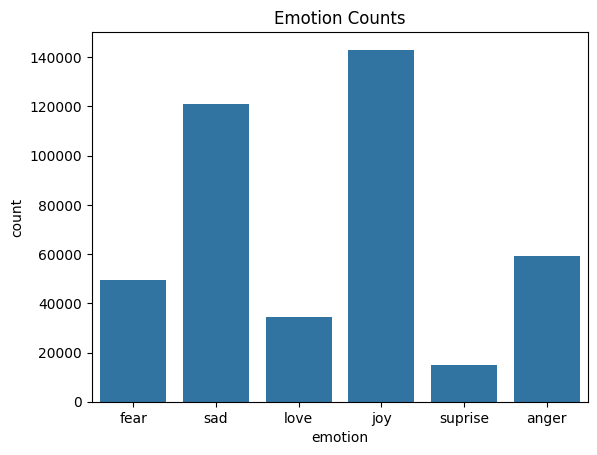

In [4]:
sns.countplot(x='emotion', data=df)
plt.title("Emotion Counts")
plt.show()

In [11]:
import nltk
nltk.download('stopwords')

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    words = [ps.stem(w) for w in text.split() if w not in stop_words]
    return ' '.join(words)
df['cleaned'] = df['sentence'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
cv = CountVectorizer()
X = cv.fit_transform(df['cleaned'])
y = df['emotion']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [13]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.89      0.82      0.86     11810
        fear       0.83      0.81      0.82      9952
         joy       0.82      0.92      0.87     28781
        love       0.77      0.51      0.61      6929
         sad       0.85      0.92      0.89     24036
     suprise       0.82      0.34      0.48      3042

    accuracy                           0.84     84550
   macro avg       0.83      0.72      0.75     84550
weighted avg       0.84      0.84      0.83     84550

Accuracy: 0.8381549379065641


In [17]:
for i in range(5):
    print("Text:", df['sentence'].iloc[i]) # Changed 'text' to 'sentence'
    print("Predicted Emotion:", model.predict(cv.transform([df['cleaned'].iloc[i]]))[0])

Text: i just feel really helpless and heavy hearted
Predicted Emotion: sad
Text: ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing
Predicted Emotion: sad
Text: i gave up my internship with the dmrg and am feeling distraught
Predicted Emotion: fear
Text: i dont know i feel so lost
Predicted Emotion: sad
Text: i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative
Predicted Emotion: sad
